<a href="https://colab.research.google.com/github/yogi05AI/niyata_task_2_online_retail_store/blob/main/niyata_online_retail_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
df = pd.read_csv("/content/online_retail_customer_churn.csv")

In [ ]:
# Creating Target Variable (Purchase within Next Week)
df['Purchase_Next_Week'] = (df['Last_Purchase_Days_Ago'] <= 7).astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [ ]:
print(df.describe())

       Customer_ID          Age  Annual_Income  Total_Spend  \
count  1000.000000  1000.000000    1000.000000   1000.00000   
mean    500.500000    43.267000     111.962960   5080.79265   
std     288.819436    15.242311      52.844111   2862.12335   
min       1.000000    18.000000      20.010000    108.94000   
25%     250.750000    30.000000      67.800000   2678.67500   
50%     500.500000    43.000000     114.140000   4986.19500   
75%     750.250000    56.000000     158.452500   7606.47000   
max    1000.000000    69.000000     199.730000   9999.64000   

       Years_as_Customer  Num_of_Purchases  Average_Transaction_Amount  \
count        1000.000000       1000.000000                 1000.000000   
mean            9.727000         49.456000                  266.876530   
std             5.536346         28.543595                  145.873445   
min             1.000000          1.000000                   10.460000   
25%             5.000000         25.000000                  13

In [ ]:
print(df['Purchase_Next_Week'].value_counts())

Purchase_Next_Week
0    981
1     19
Name: count, dtype: int64


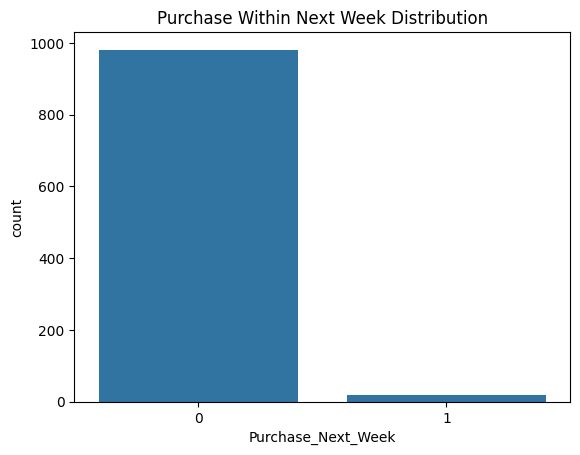

In [ ]:
# Visualizing Target Distribution
sns.countplot(x=df['Purchase_Next_Week'])
plt.title("Purchase Within Next Week Distribution")
plt.show()

In [ ]:
# Encoding Categorical Variables
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])
df['Promotion_Response'] = label_enc.fit_transform(df['Promotion_Response'])

In [ ]:
# Dropping Unnecessary Columns
df.drop(columns=['Customer_ID', 'Target_Churn'], inplace=True)

In [ ]:
# Splitting Data
from sklearn.model_selection import train_test_split, GridSearchCV
X = df.drop(columns=['Purchase_Next_Week'])
y = df['Purchase_Next_Week']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Scaling Numerical Features
scaler = StandardScaler()
num_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
print("Checking training data shape:", X_train.shape, y_train.shape)
print("Checking test data shape:", X_test.shape, y_test.shape)
print("Checking unique labels in y_train:", np.unique(y_train))

Checking training data shape: (800, 13) (800,)
Checking test data shape: (200, 13) (200,)
Checking unique labels in y_train: [0 1]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Function to Evaluate with Cross-Validation
def train_and_evaluate_cv(model, model_name):
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # Cross-validation score to check generalization
    # Moved the cross-validation inside the function and using the 'model' parameter
    cv_score = cross_val_score(model, X_train_bal, y_train_bal, cv=5, scoring='roc_auc')
    print(f"{model_name} CV AUC Score:", np.mean(cv_score))

Logistic Regression Performance:
Accuracy: 0.855
ROC AUC Score: 0.9566326530612245
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       196
           1       0.12      1.00      0.22         4

    accuracy                           0.85       200
   macro avg       0.56      0.93      0.57       200
weighted avg       0.98      0.85      0.91       200



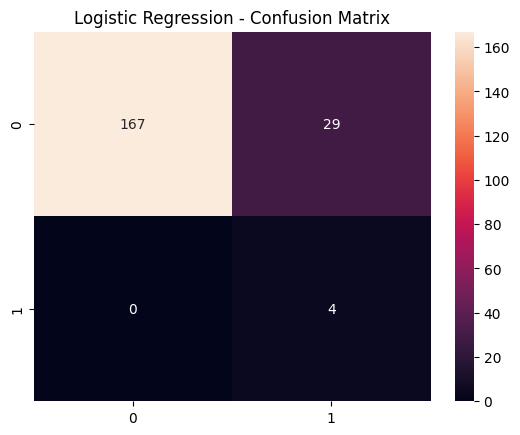

Logistic Regression CV AUC Score: 0.9823836619148721


In [ ]:
# 📌 Logistic Regression (L2 regularization + balanced class weights)
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=0.01, solver='lbfgs', max_iter=500, class_weight='balanced')
train_and_evaluate_cv(log_model, "Logistic Regression")

Support Vector Machine Performance:
Accuracy: 0.965
ROC AUC Score: 0.9158163265306123
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       196
           1       0.00      0.00      0.00         4

    accuracy                           0.96       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.96      0.96      0.96       200



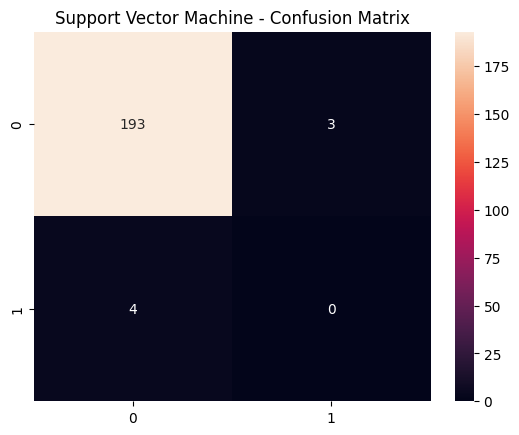

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, kernel='rbf', class_weight='balanced', random_state=42)
train_and_evaluate(svm_model, "Support Vector Machine")

K-Nearest Neighbors Performance:
Accuracy: 0.85
ROC AUC Score: 0.5248724489795918
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92       196
           1       0.04      0.25      0.06         4

    accuracy                           0.85       200
   macro avg       0.51      0.56      0.49       200
weighted avg       0.96      0.85      0.90       200



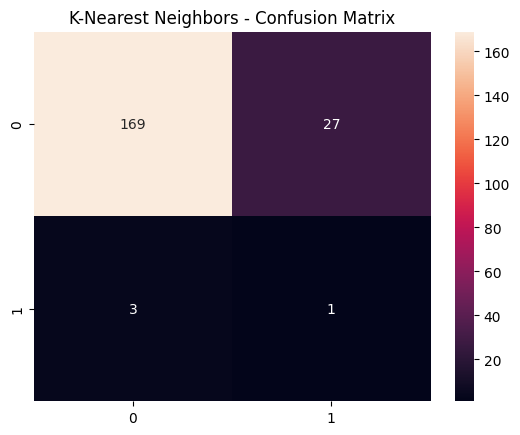

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn_model, "K-Nearest Neighbors")